In [40]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [41]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [42]:
d["height"].mean()

154.5970926136364

In [43]:
d["height"].std()

7.742332137351995

# Prior predictive checks

In [44]:
model_ppc=CmdStanModel(stan_file='height_1_pcc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,
                     refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [45]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,183.541,15.7772,163.468
1,0.0,0.0,170.638,13.6106,173.988
2,0.0,0.0,175.994,17.2653,192.756
3,0.0,0.0,172.777,15.5989,172.433
4,0.0,0.0,176.560,14.6579,172.000
...,...,...,...,...,...
995,0.0,0.0,169.864,15.5211,182.043
996,0.0,0.0,167.970,13.8066,171.750
997,0.0,0.0,166.817,14.8988,167.878
998,0.0,0.0,170.046,15.2480,146.768


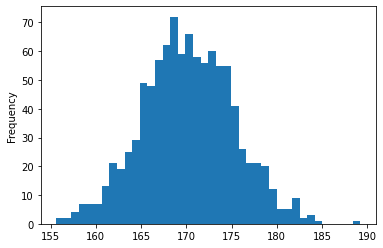

In [46]:
df['mu'].plot.hist(bins=40)
plt.show()

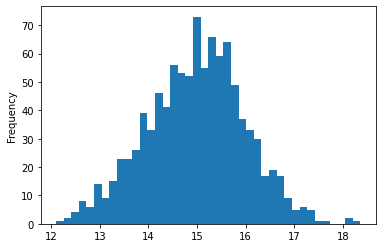

In [47]:
df['sigma'].plot.hist(bins=40)
plt.show()

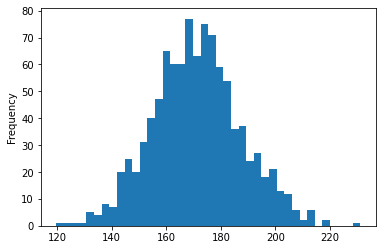

In [48]:
df['height'].plot.hist(bins=40)
plt.show()

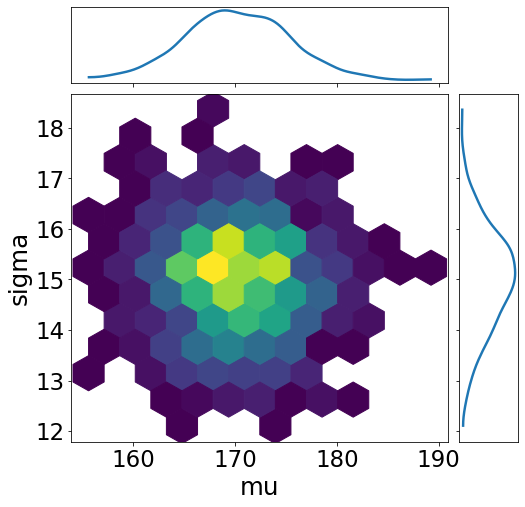

In [49]:
az.plot_pair(
    sim,
    var_names=["mu", "sigma"],
    kind="hexbin",
    marginals=True,
    figsize=(8, 8),
)
plt.show()

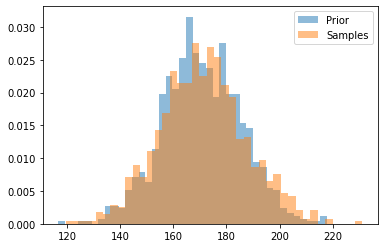

In [50]:
prior = np.random.normal(170, 15, R)
fig, ax = plt.subplots()
ax.hist(prior, bins=40, alpha=0.5, density=True, label='Prior')
ax.hist(df['height'], bins=40, alpha=0.5, density=True, label='Samples')
ax.legend()
plt.show()

In [51]:
df["height"].mean()

171.24215999999998

In [52]:
df["height"].std()

16.151664194895357

### Samples are consistent with priors and observed data is possible to obtain using prior.
<br><br>

# Model fit and evaluation

In [53]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [54]:
fit=model_1_fit.sample(data=dict(N=len(d), heights=d.height.values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [55]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,heights_pred
0,-925.039,0.997516,0.851161,2.0,3.0,0.0,926.836,154.463,8.61784,144.608
1,-925.152,0.883637,0.851161,1.0,3.0,0.0,926.452,155.103,8.31445,152.507
2,-925.081,0.914748,0.851161,3.0,7.0,0.0,926.221,154.393,8.27846,155.496
3,-927.291,0.744238,0.851161,2.0,3.0,0.0,928.160,153.713,8.37281,159.604
4,-927.026,1.000000,0.851161,2.0,7.0,0.0,927.318,155.682,8.43007,162.645
...,...,...,...,...,...,...,...,...,...,...
3995,-925.162,0.894975,0.958162,2.0,3.0,0.0,926.311,155.116,8.33014,166.062
3996,-925.240,0.833705,0.958162,1.0,3.0,0.0,926.500,154.288,8.54380,155.836
3997,-925.339,0.988741,0.958162,2.0,7.0,0.0,925.740,154.769,8.05847,158.499
3998,-925.396,0.995165,0.958162,2.0,3.0,0.0,925.525,154.799,8.04573,172.279


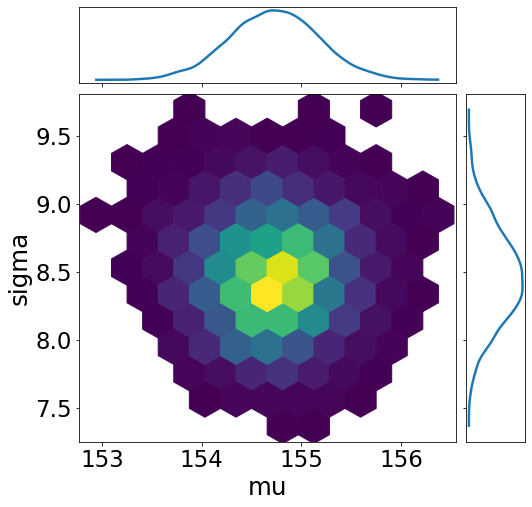

In [56]:
az.plot_pair(
    fit,
    var_names=["mu", "sigma"],
    kind="hexbin",
    marginals=True,
    figsize=(8, 8),
)
plt.show()

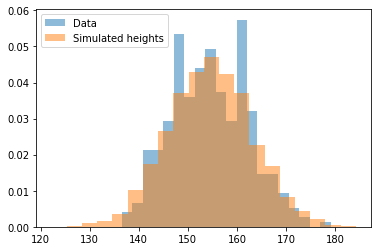

In [57]:
fig, ax = plt.subplots()
ax.hist(d["height"], bins=20, alpha=0.5, density=True, label='Data')
ax.hist(df['heights_pred'], bins=20, alpha=0.5, density=True, label='Simulated heights')
ax.legend()
plt.show()

In [58]:
df['heights_pred'].mean()

154.615565

In [59]:
df['heights_pred'].std()

8.50099871421351

Model fit to data, it's mean and std are consistent with data, but the data distribution looks a bit different. <br><br>

# Adding predictor to the model - weight

In [60]:
d['c_weight'] = d.weight - d.weight.mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

# Prior predictive checks

In [62]:
model_ppc=CmdStanModel(stan_file='height_2a_pcc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/lab_3/height_2a_pcc.stan to exe file /home/lab_3/height_2a_pcc
INFO:cmdstanpy:compiled model executable: /home/lab_3/height_2a_pcc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab_3/height_2a_pcc.hpp /home/lab_3/height_2a_pcc.stan
Warning in '/home/lab_3/height_2a_pcc.stan', line 3, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab_3/height_2a_pcc.stan', line 16, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare 


INFO:cmdstanpy:CmdStan done processing.


In [63]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,alpha,betha,height[1],height[2],height[3],height[4],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,NaN,15.7772,183.541,-1.272270,203.263,178.500,203.476,217.676,...,186.442,196.974,190.727,169.711,142.969,155.456,158.830,174.345,165.967,170.792
1,0.0,0.0,NaN,14.9932,164.005,-0.003709,182.272,175.443,175.143,181.714,...,204.038,163.592,150.459,161.602,149.667,171.677,148.335,162.448,183.499,162.801
2,0.0,0.0,NaN,13.8614,167.865,-1.221870,204.507,181.468,181.059,190.873,...,177.273,133.864,172.418,155.305,176.992,149.190,162.049,153.685,146.112,148.828
3,0.0,0.0,NaN,14.7455,165.089,-0.507911,191.756,162.099,168.285,157.108,...,167.160,160.877,164.039,179.091,151.116,150.202,170.101,149.547,162.259,150.691
4,0.0,0.0,NaN,16.6710,165.033,-0.702745,131.299,164.497,160.831,160.541,...,182.711,177.898,143.404,158.105,152.378,146.698,144.900,165.933,162.432,138.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,NaN,16.2613,165.938,-0.605764,190.412,148.022,175.219,173.685,...,168.285,118.766,171.966,152.211,200.320,152.304,155.891,190.592,148.564,138.635
996,0.0,0.0,NaN,16.2234,174.591,0.678474,176.022,175.700,159.259,169.473,...,175.205,192.367,192.180,156.389,199.172,178.118,152.307,207.699,181.036,183.727
997,0.0,0.0,NaN,14.7279,168.698,-2.800030,200.498,224.282,215.755,203.740,...,125.049,126.547,139.869,102.715,129.115,137.765,107.034,126.236,108.453,111.139
998,0.0,0.0,NaN,15.9872,157.029,-1.225430,188.372,177.132,169.554,180.555,...,137.502,138.100,110.369,126.121,156.724,134.693,155.812,119.285,113.734,138.411


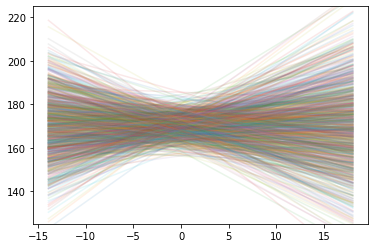

In [64]:
alpha = df['alpha']
beta = df['betha']
height = df['height[1]']

for i in range(len(alpha)):
    plt.plot(data_sim['weight'], beta[i] * data_sim['weight'] + alpha[i], alpha=0.1)
plt.ylim([125, 225])
plt.show()

### The predicted heights are possible. 
<br><br>

# Modifying prior

In [65]:
model_ppc=CmdStanModel(stan_file='height_2b_pcc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [66]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [67]:
df = sim.draws_pd()
df

,lp__,accept_stat__,sigma,alpha,betha,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,15.7772,183.541,0.727554,175.427,151.967,178.245,193.748,211.050,...,210.718,222.553,217.609,197.895,172.456,186.246,190.923,207.740,200.666,206.793
1,0.0,0.0,14.9932,164.005,0.999073,168.314,162.138,162.491,169.715,170.892,...,216.211,176.418,163.939,175.735,164.453,187.116,164.427,179.193,200.897,180.853
2,0.0,0.0,13.8614,167.865,0.736778,177.244,155.481,156.347,167.438,164.990,...,201.049,158.916,198.746,182.909,205.872,179.346,193.481,186.393,180.096,184.088
3,0.0,0.0,14.7455,165.089,0.880753,172.427,143.675,150.765,140.493,151.872,...,184.017,178.639,182.706,198.661,171.592,171.582,192.386,172.736,186.353,175.690
4,0.0,0.0,16.6710,165.033,0.838881,109.840,144.043,141.381,142.095,177.122,...,201.425,197.616,164.126,179.831,175.109,170.433,169.640,191.677,189.180,166.568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,16.2613,165.938,0.859469,170.016,128.582,156.733,156.153,159.917,...,186.071,137.507,191.662,172.861,221.924,174.863,179.405,215.060,173.987,165.012
996,0.0,0.0,16.2234,174.591,1.184850,168.973,168.982,152.871,163.414,139.164,...,181.352,198.844,198.987,163.525,206.638,185.915,160.433,216.155,189.822,192.843
997,0.0,0.0,14.7279,168.698,0.496581,154.611,180.543,174.163,164.296,167.550,...,165.066,168.712,184.182,149.176,177.723,188.521,159.937,181.287,165.652,170.485
998,0.0,0.0,15.9872,157.029,0.736123,161.068,151.106,144.806,157.085,169.013,...,161.313,163.189,136.736,153.766,185.647,164.894,187.291,152.041,147.768,173.723


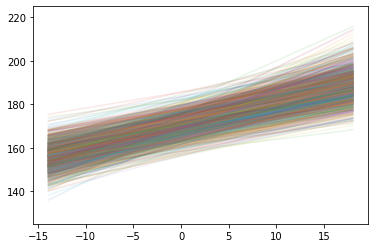

In [68]:
alpha = df['alpha']
beta = df['betha']
height = df['height[1]']

for i in range(len(alpha)):
    plt.plot(data_sim['weight'], beta[i] * data_sim['weight'] + alpha[i], alpha=0.1)
plt.ylim([125, 225])
plt.show()

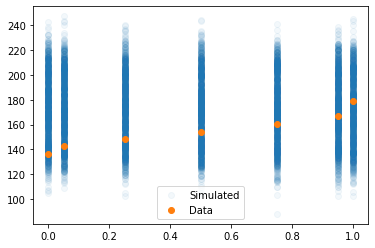

In [79]:
all_heights = df.loc[:, 'height[1]':'height[50]']
quantiles = [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]
simulated_quantiles = np.quantile(all_heights, quantiles, axis=1)
data_quantiles = np.quantile(d.height, quantiles)

plt.figure()
plt.scatter(quantiles * np.ones((1000, 1)), simulated_quantiles, alpha=0.05, label='Simulated')
plt.scatter(quantiles, data_quantiles, label='Data')
plt.legend()
plt.show()

### Yes, observed data is consistent with the prior model.
<br><br>

# Fitting and evaluating model

In [92]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [94]:
data_fit = {'N':50, 'heights': d['height'].head(50), 'weight': d['weight'].head(50)}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [95]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,betha,sigma,...,heights_pred[41],heights_pred[42],heights_pred[43],heights_pred[44],heights_pred[45],heights_pred[46],heights_pred[47],heights_pred[48],heights_pred[49],heights_pred[50]
0,-148.543,0.955261,0.470961,2.0,7.0,0.0,149.961,150.771,0.065227,11.7532,...,143.841,131.578,155.456,149.781,157.330,144.432,166.090,151.246,156.169,146.324
1,-148.494,0.984255,0.470961,2.0,3.0,0.0,148.938,151.787,0.094714,11.7862,...,150.513,144.457,153.259,153.339,134.350,176.847,163.076,164.040,153.018,159.014
2,-150.730,0.946683,0.470961,3.0,7.0,0.0,151.087,154.678,0.077513,14.6765,...,131.035,163.609,159.248,171.001,153.143,172.843,161.089,190.815,164.251,189.382
3,-148.344,0.886927,0.470961,2.0,7.0,0.0,152.894,152.498,0.053258,11.9178,...,161.689,152.809,153.967,164.287,145.340,174.994,164.747,141.653,160.841,160.223
4,-149.186,0.959718,0.470961,2.0,3.0,0.0,149.236,153.847,0.043511,11.5967,...,156.069,157.068,161.353,157.395,158.545,170.350,172.917,144.001,170.264,143.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-149.031,0.991239,0.378170,3.0,7.0,0.0,149.319,147.571,0.144962,11.9040,...,169.122,141.936,151.545,128.654,143.298,149.167,163.684,159.462,163.277,171.130
3996,-149.340,0.959876,0.378170,3.0,15.0,0.0,151.549,146.849,0.156699,12.6856,...,154.358,153.483,164.201,138.337,182.022,176.195,161.445,139.373,149.990,132.652
3997,-151.780,0.993707,0.378170,3.0,7.0,0.0,152.081,144.474,0.260532,12.1998,...,127.985,151.956,146.955,130.334,149.855,157.415,179.789,143.394,159.959,149.053
3998,-151.489,0.995263,0.378170,2.0,3.0,0.0,151.882,144.073,0.251349,12.3398,...,160.479,132.346,173.971,154.160,171.345,167.727,141.437,156.274,166.817,141.680


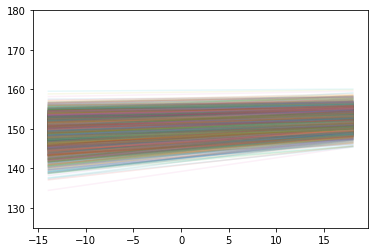

In [98]:
alpha = df['alpha']
beta = df['betha']

for i in range(len(alpha)):
    plt.plot(data_sim['weight'], beta[i] * data_sim['weight'] + alpha[i], alpha=0.1)
plt.ylim([125, 180])
plt.show()

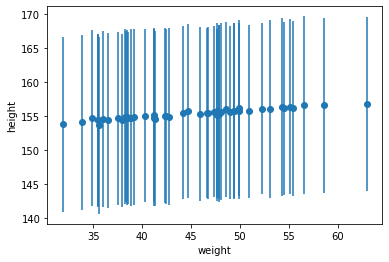

In [103]:
weights = d['weight'].head(50)
heights = df.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure()
plt.errorbar(weights, y=mean, yerr=std, fmt='o')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

# Extending the model

In [105]:
data_fit = {'N':50, 'heights': d['height'].head(50), 'weight': d['c_weight'].head(50)}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [106]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,betha,sigma,...,heights_pred[41],heights_pred[42],heights_pred[43],heights_pred[44],heights_pred[45],heights_pred[46],heights_pred[47],heights_pred[48],heights_pred[49],heights_pred[50]
0,-141.488,0.920383,0.835419,3.0,7.0,0.0,141.656,157.785,0.616709,13.15580,...,145.532,166.412,150.934,152.975,165.212,153.249,160.452,166.225,155.030,155.831
1,-140.221,0.776126,0.835419,3.0,7.0,0.0,143.873,155.076,0.905644,9.77165,...,150.549,160.496,167.478,151.593,168.394,167.216,175.769,166.144,167.761,148.349
2,-140.421,0.969324,0.835419,2.0,7.0,0.0,140.709,153.360,0.833841,13.28300,...,144.526,134.207,155.643,134.626,149.274,193.297,156.021,173.170,167.818,168.979
3,-138.756,1.000000,0.835419,2.0,7.0,0.0,140.121,154.697,0.863731,11.17040,...,182.007,179.840,159.437,144.203,156.105,165.108,124.341,150.326,147.688,163.353
4,-140.019,0.754364,0.835419,1.0,3.0,0.0,140.589,156.864,0.785858,11.25100,...,169.534,147.519,172.658,150.236,149.746,191.453,140.671,146.210,167.660,158.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-139.851,0.995774,0.708144,3.0,7.0,0.0,142.953,152.921,0.746688,12.57120,...,147.021,163.088,146.285,123.306,168.571,168.999,147.668,149.961,182.423,160.033
3996,-139.721,0.971739,0.708144,2.0,3.0,0.0,140.677,153.854,0.950748,12.84260,...,136.797,170.754,143.367,165.277,155.531,154.459,127.931,147.278,173.145,179.023
3997,-138.959,1.000000,0.708144,3.0,7.0,0.0,139.763,155.244,0.893840,11.03960,...,148.331,183.584,166.275,151.229,167.508,158.036,163.431,157.492,161.581,162.788
3998,-139.797,0.904036,0.708144,2.0,3.0,0.0,140.034,152.759,0.959320,12.27430,...,137.334,165.238,153.989,160.846,141.504,171.132,150.364,157.161,162.061,157.779


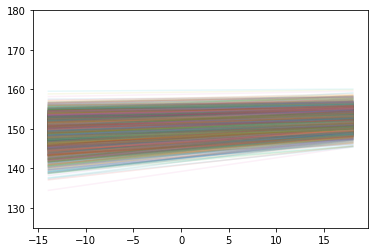

In [107]:
alpha = df['alpha']
beta = df['betha']

for i in range(len(alpha)):
    plt.plot(data_sim['weight'], beta[i] * data_sim['weight'] + alpha[i], alpha=0.1)
plt.ylim([125, 180])
plt.show()

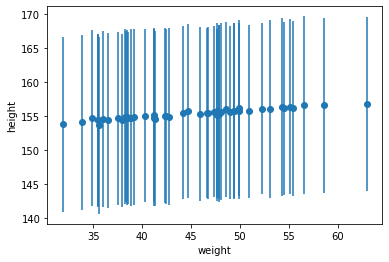

In [108]:
weights = d['weight'].head(50)
heights = df.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure()
plt.errorbar(weights, y=mean, yerr=std, fmt='o')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [109]:
model_2b_fit=CmdStanModel(stan_file='height_2b_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab_3/height_2b_fit.stan to exe file /home/lab_3/height_2b_fit
INFO:cmdstanpy:compiled model executable: /home/lab_3/height_2b_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab_3/height_2b_fit.hpp /home/lab_3/height_2b_fit.stan
Warning in '/home/lab_3/height_2b_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab_3/height_2b_fit.stan', line 4, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab_3/height_2b_fit.stan', line 14, column 4: Declaration
    of arrays by plac

In [110]:
data_fit = {'N':50, 'heights': d['height'].head(50), 'weight': d['c_weight'].head(50)}
fit=model_2b_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [111]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,betha,sigma,...,heights_pred[41],heights_pred[42],heights_pred[43],heights_pred[44],heights_pred[45],heights_pred[46],heights_pred[47],heights_pred[48],heights_pred[49],heights_pred[50]
0,-150.921,0.957629,0.570356,3.0,7.0,0.0,151.627,153.417,0.057449,14.4681,...,163.494,148.268,122.196,156.992,137.816,130.093,132.173,185.982,153.286,176.322
1,-150.255,1.000000,0.570356,3.0,7.0,0.0,151.455,154.422,0.019433,12.2413,...,160.251,156.378,153.557,152.217,158.313,152.624,156.178,139.343,137.448,144.845
2,-150.108,1.000000,0.570356,3.0,7.0,0.0,151.097,152.659,0.055816,13.9984,...,180.929,160.586,154.716,171.938,141.672,175.638,127.957,156.710,162.146,157.343
3,-150.208,0.977998,0.570356,3.0,7.0,0.0,151.384,150.440,0.049663,11.8704,...,141.533,137.150,155.773,175.254,157.548,148.797,139.092,141.569,156.615,130.541
4,-149.754,0.989518,0.570356,3.0,7.0,0.0,150.915,151.666,0.050477,13.6452,...,158.954,155.377,144.602,158.864,137.095,153.989,148.629,167.797,134.085,162.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-151.183,0.994783,0.531753,3.0,7.0,0.0,152.593,151.710,0.026837,11.1063,...,137.724,149.991,146.522,158.911,163.342,151.803,139.719,167.785,141.994,135.601
3996,-151.285,0.857706,0.531753,3.0,7.0,0.0,154.062,153.483,0.056387,14.6964,...,147.840,146.060,161.295,171.118,175.827,153.968,151.637,167.121,169.795,156.496
3997,-150.827,1.000000,0.531753,3.0,7.0,0.0,151.513,151.098,0.044562,11.1017,...,154.716,156.924,144.295,151.715,156.934,165.329,152.296,149.312,155.414,159.142
3998,-150.580,0.997761,0.531753,3.0,7.0,0.0,151.939,155.664,0.022531,13.5841,...,164.517,149.085,156.438,142.412,158.629,155.567,167.961,175.273,139.210,149.930


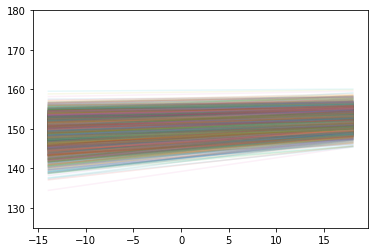

In [112]:
alpha = df['alpha']
beta = df['betha']

for i in range(len(alpha)):
    plt.plot(data_sim['weight'], beta[i] * data_sim['weight'] + alpha[i], alpha=0.1)
plt.ylim([125, 180])
plt.show()

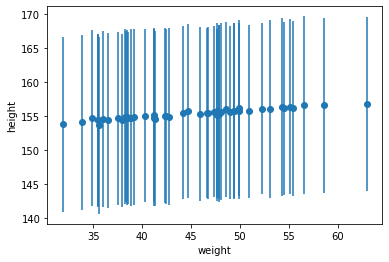

In [113]:
weights = d['weight'].head(50)
heights = df.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure()
plt.errorbar(weights, y=mean, yerr=std, fmt='o')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()